In [1]:
import numpy as np
import pandas as pd
import datetime
import csv
import re
import string
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import spacy

import pattern
from pattern.en import lemma, lexeme

from wordcloud import WordCloud, STOPWORDS

In [2]:
with open('alexa_cleaned.pkl','rb') as read_file:
    alexa_df = pickle.load(read_file)

alexa_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music


In [3]:
alexa_df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [4]:
alexa_df = alexa_df[alexa_df['variation']!='Configuration: Fire TV Stick ']

In [5]:
#remove accessory

alexa_df = alexa_df[alexa_df['variation']!='Configuration: Fire TV Stick']

In [6]:
## echo dot vs echo vs echo spot vs echo plus vs echo show (maybe)

# echo dots
# echo dot = black dot, charcoal fabric, white dot
alexa_df['variation'] = alexa_df['variation'].replace('Black  Dot', 'Echo Dot')
alexa_df['variation'] = alexa_df['variation'].replace('White  Dot', 'Echo Dot')

# echo 
# echo = oak finish, walnut finish, black, heather grey fabric, white, sandstone fabric
alexa_df['variation'] = alexa_df['variation'].replace('Oak Finish ', 'Echo')
alexa_df['variation'] = alexa_df['variation'].replace('Walnut Finish ', 'Echo')
alexa_df['variation'] = alexa_df['variation'].replace('Black', 'Echo')
alexa_df['variation'] = alexa_df['variation'].replace('White', 'Echo')
alexa_df['variation'] = alexa_df['variation'].replace('Sandstone Fabric ', 'Echo')
alexa_df['variation'] = alexa_df['variation'].replace('Charcoal Fabric ', 'Echo')
alexa_df['variation'] = alexa_df['variation'].replace('Heather Gray Fabric ', 'Echo')

# echo plus
# echo plus = black plus, white plus,
alexa_df['variation'] = alexa_df['variation'].replace('Black  Plus', 'Echo Plus')
alexa_df['variation'] = alexa_df['variation'].replace('White  Plus', 'Echo Plus')

# echo spot
# echo spot = black spot, white spot
alexa_df['variation'] = alexa_df['variation'].replace('Black  Spot', 'Echo Spot')
alexa_df['variation'] = alexa_df['variation'].replace('White  Spot', 'Echo Spot')

#echo show = black show, white show 
alexa_df['variation'] = alexa_df['variation'].replace('Black  Show', 'Echo Show')
alexa_df['variation'] = alexa_df['variation'].replace('White  Show', 'Echo Show')


In [7]:
alexa_df['variation'].value_counts()

Echo         1052
Echo Dot      700
Echo Spot     350
Echo Show     350
Echo Plus     348
Name: variation, dtype: int64

In [8]:
pickle.dump(alexa_df, open("alexa_grouped.pkl", "wb" ))

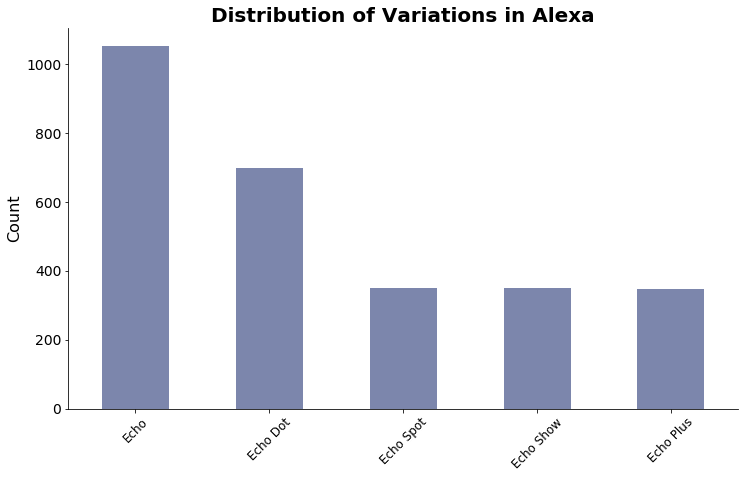

In [9]:
# color = plt.cm.bone(np.linspace(0, 1, 7))
ax = alexa_df['variation'].value_counts().plot.bar(color='#7c86ac', figsize = (12, 7))

plt.title('Distribution of Variations in Alexa', fontsize = 20, weight='bold')
# plt.xlabel('variations', fontsize = 14)
plt.ylabel('Count', fontsize=16)

plt.xticks(rotation='45', fontsize=12)
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

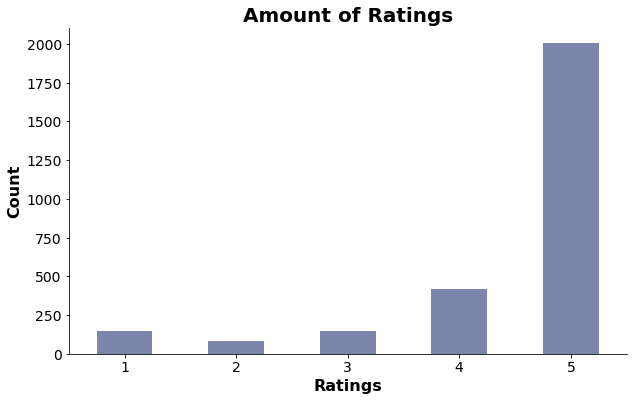

In [10]:
group = alexa_df.groupby('rating').count()
group['date']

color = plt.cm.bone(np.linspace(0, 1, 6))
ax = group['date'].plot.bar(color='#7c86ac', figsize = (10, 6))

plt.title('Amount of Ratings', fontsize = 20, weight='bold')
plt.xlabel('Ratings', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')

plt.xticks(rotation='0', fontsize=14)
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

#change colour

### Splitting things up

In [11]:
# Echo
echo_df = alexa_df[alexa_df['variation'] == 'Echo']
echo_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
0,5,31-Jul-18,Echo,Love my Echo!,1,13,love echo
1,5,31-Jul-18,Echo,Loved it!,1,9,love
2,4,31-Jul-18,Echo,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...
3,5,31-Jul-18,Echo,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Echo,Music,1,5,music


In [12]:
echo_df['rating'].value_counts()

5    788
4    146
1     49
3     46
2     23
Name: rating, dtype: int64

In [13]:
pickle.dump(echo_df, open("echo.pkl", "wb" ))

In [14]:
# Dot 
dot_df = alexa_df[alexa_df['variation'] == 'Echo Dot']
dot_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
2450,5,31-Jul-18,Echo Dot,I set her up to play through our home theater ...,1,152,set play home theater system fat use weather f...
2451,5,31-Jul-18,Echo Dot,Small device that my kids like to ask question...,1,80,small device kid like ask question handy frien...
2452,5,31-Jul-18,Echo Dot,beyond awesome,1,14,beyond awesome
2453,5,31-Jul-18,Echo Dot,I like that it responds every time. It was eas...,1,135,like respond every time easy set still learn m...
2454,5,31-Jul-18,Echo Dot,Family loved it!,1,16,family love


In [15]:
dot_df['rating'].value_counts()

5    486
4    120
3     46
1     32
2     16
Name: rating, dtype: int64

In [16]:
pickle.dump(dot_df, open("echo_dot.pkl", "wb" ))

In [17]:
# Echo Show
show_df = alexa_df[alexa_df['variation'] == 'Echo Show']
show_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
1400,5,31-Jul-18,Echo Show,I love love love love it! I feel like I have ...,1,90,love love love love feel like talk computer te...
1401,5,31-Jul-18,Echo Show,Love the Echo Show. Being able to see the lyr...,1,137,love echo show able see lyric song play able p...
1402,3,31-Jul-18,Echo Show,It seems to work well. Unfortunately a lot of...,1,459,seem work well unfortunately lot functionality...
1403,5,31-Jul-18,Echo Show,Love listening to music. Still trying to learn...,1,66,love listening music still try learn everything
1404,4,31-Jul-18,Echo Show,Very pleasedSimple to figure out,1,32,pleasedsimple figure


In [18]:
show_df['rating'].value_counts()

5    247
4     57
1     18
3     17
2     11
Name: rating, dtype: int64

In [19]:
pickle.dump(show_df, open("echo_show.pkl", "wb" ))

In [20]:
# Echo Spot
spot_df = alexa_df[alexa_df['variation'] == 'Echo Spot']
spot_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
1050,5,31-Jul-18,Echo Spot,I used the product for my phone to look up the...,1,71,use product phone look weather watch video
1051,4,31-Jul-18,Echo Spot,Don’t use it for much as I thought we would. S...,1,218,do not use much think sync kasa cam use check ...
1052,5,30-Jul-18,Echo Spot,Amazing so far. Just got it the other day.,1,42,amazing far get day
1053,4,30-Jul-18,Echo Spot,"I like that it's smaller, but it has never und...",1,108,like small never understand command easily fir...
1054,4,30-Jul-18,Echo Spot,Worthy successor to the echo dot and right at ...,1,139,worthy successor echo dot right home bed room ...


In [21]:
spot_df['rating'].value_counts()

5    241
4     48
1     27
3     17
2     17
Name: rating, dtype: int64

In [22]:
pickle.dump(spot_df, open("echo_spot.pkl", "wb" ))

In [23]:
# Echo plus
plus_df = alexa_df[alexa_df['variation'] == 'Echo Plus']
plus_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews
1750,4,31-Jul-18,Echo Plus,We use Alexa primarily for listening to music ...,1,205,use alexa primarily listen music check weather...
1751,5,31-Jul-18,Echo Plus,Plug n Play set up is simple. Added battery ba...,1,103,plug n play set simple add battery base make p...
1752,5,30-Jul-18,Echo Plus,Great speaker i n this! I love this so much mo...,1,126,great speaker n love much alexa tap -PRON- ’s ...
1753,4,30-Jul-18,Echo Plus,She's [Alexa] a bit dense and still learning t...,1,99,alexa bit dense still learn way phrase thing n...
1754,5,30-Jul-18,Echo Plus,Great sound and easy to set up. Purchased the ...,1,155,great sound easy set purchase echo plus build ...


In [24]:
plus_df['rating'].value_counts()

5    242
4     50
1     22
3     20
2     14
Name: rating, dtype: int64

In [25]:
pickle.dump(plus_df, open("echo_plus.pkl", "wb" ))